# Monte Carlo integration by Vegas

## Vegas Algorithm

We proved before that the best weight function has the propery:
\begin{eqnarray}
 \lambda \propto \left[\int dx_1 dx_2\cdots dx_n \frac{|f(x_1,x_2,\cdots,x_n)|^2}{(w(x_1,x_2,\cdots,x_n))^2}\right]
\end{eqnarray}

The **Vegas** method is primary based on the importance sampling algorithm with the above mentioned self-adapting strategy. The basic idea is to use a *separable weigh function*. Thus instead of complicated $w(x_1,x_2,x_3,\cdots)$ one uses an ansatz
$w=w_1(x_1)w_2(x_2)w_3(x_3)\cdots$.

The optimal separable weigh functions are
\begin{eqnarray}
 (w_1(x_1))^2 \propto \left[\int dx_2 dx_3\cdots dx_n \frac{|f(x_1,x_2,x_3,\cdots,dx_n)|^2}{(w_2(x_2)w_3(x_3)\cdots w_n(x_n))^2}\right]
\end{eqnarray}
as follows from our ansatz and previous proof of optimal weight function.

The power of Vegas is that by iteration, it can resolve any divergent point which is separable, i.e., it is *parallel to any axis*. However, when the divergency is *along diagonal* Vegas is similar to usual MC sampling. Note that separable ansatz avoids the explosion of stratified regions, which scale as $K^d$, while separable ansatz scales as $K\times d$. ($K$ is number of points in one dimension, i.e., typically $K\approx 10^2$, $d\approx 10 \rightarrow$ ZettaByte versus KiloByte).


The algorithm starts with the separable weight function, which we will
call a grid, $g_i(x)$.
We want to evaluate
\begin{eqnarray}
&&\int_{a_1}^{b_1} dg_1 \int_{a_2}^{b_2} dg_2\cdots\int_{a_n}^{b_n} dg_n f(g_1,g_2,\cdots,g_n)=
\nonumber\\
&&\int_0^1 dx_1\int_0^1 dx_2\cdots\int_0^{x_n} f(g_1(x_1),g_2(x_2),\cdots,g_n(x_n))
  \frac{dg_1}{dx_1}\frac{dg_2}{dx_2}\cdots\frac{dg_n}{dx_n}
\end{eqnarray}
Note that $g_1$ depends only on $x_1$, and $g_2$ only on $x_2$, so that the
Jacobian of such separable set of functions is just the product of all derivatives.
Also note that here we interpret $(dg_i(x_i)/dx_i)^{-1} = w_i(x_i)$.


We first start with the grid functions $g_i(x)=a_i + x (b_i-a_i)$, so that the
integration at the first iteration is equivalent to the usual Monte Carlo
sampling.

We generate a few thousand sets of random points $(x_1,x_2,\cdots,x_n)$ and
evaluate $f$ on these points. 
During the sampling we evaluate the integral
\begin{eqnarray}
⟨f⟩=\sum_{x_1,x_2,\cdots,x_n} f(g_1(x_1),g_2(x_2),\cdots,g_n(x_n))
\frac{dg_1}{dx_1}\frac{dg_2}{dx_2}\cdots\frac{dg_n}{dx_n},
\label{vegas_int}
\end{eqnarray}
Note that random points are uniformly distributed on mesh $x_i$ ($x_i \in [0,1) $), 
therefore the unit volume $\int dx dy \cdots =1$.

We will also construct the projection of the function $f$ to all dimenions. We start by sampling the following functions: 
\begin{eqnarray}
f_1(x_1) = \sum_{x_2,x_3} |f(g_1(x_1),g_2(x_2),g_3(x_3)) \frac{dg_1}{dx_1}\frac{dg_2}{dx_2}\frac{dg_3}{dx_3}|^2\\ 
f_2(x_2) = \sum_{x_1,x_3} |f(g_1(x_1),g_2(x_2),g_3(x_3)) \frac{dg_1}{dx_1}\frac{dg_2}{dx_2}\frac{dg_3}{dx_3}|^2\\
f_3(x_3) = \sum_{x_1,x_2} |f(g_1(x_1),g_2(x_2),g_3(x_3))\frac{dg_1}{dx_1}\frac{dg_2}{dx_2}\frac{dg_3}{dx_3}|^2
\label{vegas_weight}
\end{eqnarray}
and then we normalize these projected functions and take the square root, because we squared the function before (notice that optimal weight function squared is proportional to $f^2$). 
The projection of the function to each dimension is than
\begin{eqnarray}
\widetilde{f}_i(x)= \sqrt{\frac{f_i(x)}{\int_0^1 f_i(x) dx}},
\end{eqnarray}
so that we map the interval $[0,1]\rightarrow [0,1]$. This is choosen as our weight function $w_i\propto \widetilde{f}_i$.

In Vegas the weight functions are 
$$w_i(x) = \frac{1}{\frac{dg_i(x)}{dx}} \propto \widetilde{f}_i(g_i(x))$$
This requires that
\begin{eqnarray}
\widetilde{f}_i(g_i(x))\frac{dg_i(x)}{dx}=const
\end{eqnarray}

This can also be understood as simple 1D problem involving a change of variable. We aim to find a refined grid $g(x)$ using the projected function $\widetilde{f}$. When using this improved grid function $g(x)$, 
we want each small interval of the integral to contribute equally to the integral, i.e., 
$$ \int_{g_{l}}^{g_{l+1}} \widetilde{f}(g) dg = const$$

We can also write
\begin{eqnarray}
\int \widetilde{f}(g)dg = \int \widetilde{f}(g(x))\frac{dg}{dx}dx,
\end{eqnarray}
we would like to have
\begin{eqnarray}
\widetilde{f}(g(x))\frac{dg}{dx} = const
\end{eqnarray}
which is the same as requirement above.

To determine the new grid $g_l$, we will determine the grip points numerically so that
\begin{eqnarray}
\int_0^1 \widetilde{f}(g_{old}) dg_{old} = I\\
\int_{g^{new}_{l-1}}^{g^{new}_l} \widetilde{f}(g_{old})dg_{old} = \frac{I}{N_g}
\label{f_int}
\end{eqnarray}
where $N_g$ is the number of gridpoints.
Hence, we require that there is exactly the same weight between each
two consecutive points (between $g_{0}$ and $g_1$,  and between $g_1$ and $g_2$,....).


Once we have a new grid, we can restart the sampling of the
integral of $f$, just like in Eqs. for $⟨f⟩$, $f_1(x_1)$, $f_2(x_2)$, $f_3(x_3),$ but using $g_{new}$.
We generate again a few thousand random set of points $(x_1,x_2,x_3)$ and
obtain $\widetilde{f}_i(x)$ functions. We then repeat this procedure
approximately 10-times, and we can slightly increase the number of
random points each time, as the grid functions becomes more are more
precise. At the end, we can run a single long run with 10-times longer
sampling, to reduce sampling error-bar.

In practice, we will implement one more tricks, to make the algorithm more stable.
When we compute the separable function $\widetilde{f}_i(x)$, we
will smoothen it, because we want to avoid accessive discontinuities
due to finite number of random points. We will just average over
nearest neighbors
\begin{eqnarray}
\widetilde{f}_i \leftarrow \frac{\widetilde{f}_{i-1}+\widetilde{f}_i +\widetilde{f}_{i+1}}{3}
\end{eqnarray}
Note, be careful at the endpoints, where you need to average over two
points only.


Finally, for the grid $g(x)$ we will have the grid of points
distributed between $[0,1]$ so that $x_0 = \frac{1}{N}$,
$x_1=\frac{2}{N}$, $\cdots$, $x_{N-2}=\frac{N-1}{N}$, $x_{N-1}=1$. We know that $g(x=0)=0$,
hence we do not need to save pont $x=0$, but we need to be careful
when interpolating at the point $x_0$. For such equidistant mesh, it is
clear that given a point $x\in [0,1]$, we
can compute $i=int(x N)$, and then we know that $x$ appears between
$x_{i-1}$ and $x_i$, and linear interpolation gives
\begin{eqnarray}
&&g(x) = g_{i-1} + (g_{i}-g_{i-1})\frac{(x-i/N)}{1/N}\\
&&g(x) = g_{0}\; x N \quad if\quad i=0
\end{eqnarray}

Finally, we want to discuss the calculation of the error and
confidence in the result.
We will perform $M$ outside iterations (which update the grid). Each
such iteration will consist of $n_i$ function evaluations (of the order of few
thousand to ten thousand). From all these calculations $M*n$ we want
to evaluate the best estimate of the integral, and its estimation for
the error. 

At each iteration,  we will sample the following qualities:
\begin{eqnarray}
&& ⟨f_w⟩_i = \frac{1}{n_i}\sum_{j=1}^{n_i}  f(g_1({x_1}_j),g_2({x_2}_j),g_3({x_3}_j))\frac{dg_1}{dx_1}({x_1}_j)\frac{dg_2}{dx_2}({x_2}_j)\frac{dg_3}{dx_3}({x_3}_j)\\
&& ⟨f_w^2⟩_i = \frac{1}{n_i}\sum_{j=1}^{n_i} \left(f(g_1({x_1}_j),g_2({x_2}_j),g_3({x_3}_j))\frac{dg_1}{dx_1}({x_1}_j)\frac{dg_2}{dx_2}({x_2}_j)\frac{dg_3}{dx_3}({x_3}_j)\right)^2
\end{eqnarray}
Then the estimation for the variance-square of the MC-sampling is
\begin{eqnarray}
\sigma_i^2 = \frac{ ⟨f_w^2⟩_i-⟨f_w⟩_i^2}{n_i-1} 
\end{eqnarray}
Note that the variance of the sampled function is
$\sqrt{⟨f_w^2⟩_i-⟨f_w⟩_i^2}$, which is approaching a
constant when the number of sampled points $n_i$ goes to
infinity. However, the variance of the MC-sampling is 
$\sigma_i \propto \frac{1}{\sqrt{n_i}}$, as expected.

From all accumulated evaluations of the function (in M iterations), we
can construct the best estimate of the integral. Naively, we would
just calculate $1/M\sum_i ⟨f_w⟩_i$. However, at the first few
iterations the error was way bigger than in the last iteration, and
therefore we want to penalize those early estimates, which were not so
good. We achieve that by
\begin{eqnarray}
I_{best}=\frac{\sum_{i=1}^M \frac{⟨f_w⟩_i}{\sigma_i^2}}{\sum_{i=1}^M\frac{1}{\sigma_i^2}}
\end{eqnarray}
Similarly, the error does not sum up, but is rather smaller than the
smallest error (in the last iteration). We have
\begin{eqnarray}
\frac{1}{\sigma^2}_{best} = \sum_{i=1}^M \frac{1}{\sigma_i^2}
\end{eqnarray}
and finally the $\chi^2$ can be estimated by
\begin{eqnarray}
\chi^2 = \frac{1}{M-1}\sum_{i=1}^M \frac{(⟨f_w⟩_i -I_{best})^2}{\sigma_i^2}
\end{eqnarray}


## Brute force Monte Carlo

First we will implement the simple Monte Carlo method.

In [20]:
# simple class to take care of statistically determined quantities
class Cumulants:
    def __init__(self):
        self.sum=0.0    # f_0 + f_1 +.... + f_N
        self.sqsum=0.0  # f_0^2 + f_1^2 +....+ f_N^2
        self.avg = 0.0  # I_best when many iterations, otherwise <f> = 1/N\sum_i f_i
        self.err = 0.0  # sigma of I_best when many iterations, otherwise sqrt( <f^2>-<f>^2 )/sqrt(N)
        self.chisq = 0.0
        self.weightsum=0.0 # \sum_i 1/sigma_i^2
        self.avgsum=0.0    # \sum_i <f>_i/sigma_i^2
        self.avg2sum=0.0   # \sum_i <f>_i^2/sigma_i^2

def SimpleMC(integrant, ndim, unit, maxeval, cum):
    """ integrant  -- function to integrate. It should be vectorized function!
        ndim       -- how many dimenions the function has
        unit       -- the size of the box we are using for integration [[0,L],[0,L]...]
        maxeval    -- total number of function evaluations we will perform
        cum        -- class Cumulants, which will hold all information we want to obatin.
    """
    nbatch=1000             # function will be evaluated in bacthes of 1000 evaluations at one time (for efficiency and storage issues)
    neval=0
    for nsamples in range(maxeval,0,-nbatch):  # loop over all_nsample evaluations in batches of nbatch
        # nsamples counts remaining number of function evaluations
        n = min(nbatch,nsamples)  # How many evaluations in this pass?
        xr = unit*random.random((n,ndim)) # generates 2-d array of random numbers in the interval [0,1)
        wfun = integrant(xr)  # n function evaluations required in single call
        neval += n  # We just added so many fuction evaluations
        cum.sum += sum(wfun)      # sum_i f_i = <fw> * neval
        cum.sqsum += sum(wfun*wfun)    # sum_i f_i^2 = <fw^2> * neval
    
    cum.avg = cum.sum/neval
    w0 = sqrt(cum.sqsum/neval)  # sqrt(<f^2>)
    cum.err = sqrt((w0-cum.avg)*(w0+cum.avg)/neval) # sqrt(sqsum-sum**2)
    cum.avg *= unit**ndim  # adding units if not [0,1] interval
    cum.err *= unit**ndim  # adding units if not [0,1] interval

We used here a simple trick to avoid overflow, i.e.,

\begin{eqnarray}
\sqrt{\frac{\langle f^2\rangle-\langle f\rangle^2}{N}} = 
\sqrt{\frac{(\sqrt{\langle f^2\rangle}-\langle f\rangle)(\sqrt{\langle f^2\rangle}+\langle f\rangle)}{N}}
\end{eqnarray}

For testing, we will integrate
$$ \frac{1}{\pi^3}\int_0^\pi dx\int_0^\pi dy \int_0^\pi dz  \frac{1}{1-\cos(x) \cos(y) \cos(z)}$$

In [21]:
def my_integrant2(x):
    """ For testing, we are integration the function
       1/(1-cos(x)*cos(y)*cos(z))/pi^3
       in the interval [0,pi]**3
    """
    #nbatch,ndim = shape(x)
    return 1.0/(1.0-cos(x[:,0])*cos(x[:,1])*cos(x[:,2]))/pi**3

In [31]:
from scipy import *
from numpy import *
unit=pi
ndim=3
maxeval=200000
exact = 1.3932  # exact value of the integral
    
cum = Cumulants()
    
SimpleMC(my_integrant2, ndim, pi, maxeval, cum)
print(cum.avg, '+-', cum.err, 'exact=', exact)
print('how many sigma away', abs(cum.avg-exact)/cum.err)

1.382434819789234 +- 0.011166599305649706 exact= 1.3932
how many sigma away 0.9640518045023243


## Vegas

First we define the grid points $g(x)$. At the beginning, we just set $g(x)=x$.

In [32]:
class Grid:
    """Contains the grid points g_n(x) with x=[0...1], and g=[0...1]
       for Vegas integration. There are n-dim g_n functions.
       Constraints : g(0)=0 and g(1)=1.
    """
    def __init__(self, ndim, nbins):
        self.g = zeros((ndim,nbins+1))  
        # a bit dirty trick: We will later use also g[-1] in interpolation, which should be set to zero, hence
        # we allocate dimension nbins+1, rather than nbins
        self.ndim=ndim
        self.nbins=nbins
        # At the beginning we set g(x)=x
        # The grid-points are x_0 = 1/N, x_1 = 2/N, ... x_{N-1}=1.0. Note x_N=x_{-1}=0 
        # Note that g(0)=0, and we skip this point on the mesh.
        for idim in range(ndim): # over all 3 dimensions
            self.g[idim,:nbins] = arange(1,nbins+1)/float(nbins)

In [33]:
def Vegas_step1(integrant, unit, maxeval, nstart, nincrease, grid, cum):
    """
        integrant  -- function to integrate. It should be vectorized function!
        unit       -- the size of the box we are using for integration [[0,L],[0,L]...]
        maxeval    -- total number of function evaluations we will perform
        nstart     -- number of MC steps in the first iteration (before refining the grid)
        nincrease  -- how many points we add once grid is refined
        grid       -- the class which contains current grid, and is self-consistently refined.
        cum        -- class Cumulants, which will hold all information we want to obatin.    
    """
    ndim, nbins = grid.ndim,grid.nbins  # dimension of the integral, size of the grid for binning in each direction
    unit_dim = unit**ndim   # converts from unit cube integration to generalized cube with unit length
    nbatch=1000             # function will be evaluated in bacthes of 1000 evaluations at one time (for efficiency and storage issues)
    neval=0
    print ("""Vegas parameters:
       ndim = """+str(ndim)+"""
       unit = """+str(unit)+"""
       maxeval = """+str(maxeval)+"""
       nstart = """+str(nstart)+"""
       nincrease = """+str(nincrease)+"""
       nbins = """+str(nbins)+"""
       nbaths = """+str(nbatch)+"\n")

    bins = zeros((nbatch,ndim),dtype=int) # in which sampled bin does this point fall?
    
    all_nsamples = nstart
    for nsamples in range(all_nsamples,0,-nbatch):  # loop over all_nsample evaluations in batches of nbatch
        # nsamples is the number of points left to evaluate
        n = min(nbatch,nsamples)  # How many evaluations in this pass?
        # We are integrating f(g_1(x),g_2(y),g_3(z))*dg_1/dx*dg_2/dy*dg_3/dz dx*dy*dz
        # This is represented as  1/all_nsamples \sum_{x_i,y_i,z_i} f(g_1(x_i),g_2(y_i),g_3(z_i))*dg_1/dx*dg_2/dy*dg_3/dz
        #  where dg_1/dx = diff*NBINS
        wgh = zeros(nbatch)          # weights for each random point in the batch
        xr = random.random((n,ndim)) # generates 2-d array of random numbers in the interval [0,1)
        # This part takes quite a lot of time and it would be nice to rewrite with numba!
        for i in range(n):   # over the batch, which is n-items long
            weight = 1.0/all_nsamples    # weight in this point of the batch, i.e., one configuration
            for dim in range(ndim):      # over all dimension of the function ovaluation
                # We want to evaluate the function f at point g(x), i.e, f(g_1(x_1),g_2(x_2),...)
                # Here we transform the points x_1,x_2,x_3 -> g_1(x_1), g_2(x_2), g_3(x_3)
                # We hence want to evaluate g(x) ~ g(x[i]), where x is the random number and g is the grid function
                # The discretized g(t) is defined on the grid :
                #       t[-1]=0, t[0]=1/N, t[1]=2/N, t[2]=3/N ... t[N-1]=1.
                # We know that g(0)=0 and g(1)=1, so that g[-1]=0.0 and g[N-1]=1.0
                # To interpolate g at x, we first compute  i=int(x*N) and then we use linear interpolation
                # g(x) = g[i-1] + (g[i]-g[i-1])*(x*N-i)  ;  if i>0
                # g(x) =   0    + (g[0]-0)*(x*N-0)       ;  if i=0
                #
                pos = xr[i,dim]*nbins               # which grid would it fit ? (x*N)
                ipos = int(pos)                     # the grid position is ipos : int(x*N)==i    
                diff = grid.g[dim,ipos] - grid.g[dim,ipos-1]  # g[i]-g[i-1]
                # linear interpolation for g(x) : 
                xr[i,dim] = (grid.g[dim,ipos-1] + (pos-ipos)*diff)*unit # g(xr) ~ ( g[i-1]+(g[i]-g[i-1])*(x*N-i) )*[units]
                bins[i,dim]=ipos                    # remember in which bin this random number falls.
                weight *= diff*nbins                #  weight for this dimension is dg/dx = (g[i]-g[i-1])*N
                                                    # because dx = i/N - (i-1)/N = 1/N
            wgh[i] = weight # total weight is for this point (df/dx)*(df/dy)*(df/dz).../N_{samples}
        # Here we evaluate function f on all randomly generated x points above
        fx = integrant(xr)  # n function evaluations required in single call
        neval += n  # We just added so many fuction evaluations
        
        # Now we compute the integral as weighted average, namely, f(g(x))*dg/dx
        wfun = wgh * fx           # weight * function ~ f_i*w_i, here w_i has 1/N in its weight, hence actually we are 
                                  # evaluating  1/N * sum_i f_i*w_i
        cum.sum += sum(wfun)      # 1/N sum_i f_i*w_i = <fw>
        wfun *= wfun              # carefull : we need 1/N (f_i w_i)^2, while this gives (f_i w_i/N)^2
        cum.sqsum += sum(wfun)    # sum_i (f_i*w_i/N)^2 = <fw^2>/all_nsamples
                                  # 
    w0 = sqrt(cum.sqsum*all_nsamples)  # w0 = sqrt(<fw^2>)
    w1 = (w0 + cum.sum)*(w0 - cum.sum) # w1 = (w0^2 - <fw>^2) = (<fw^2>-<fw>^2)
    w = (all_nsamples-1)/w1            # w ~ 1/sigma_i^2 = (N-1)/(<fw^2>-<fw>^2)
    # Note that variance of the MC sampling is Var(monte-f) = (<f^2>-<f>^2)/N == 1/sigma_i^2
    cum.weightsum += w          # weightsum ~ \sum_i 1/sigma_i^2
    cum.avgsum += w*cum.sum     # avgsum    ~ \sum_i <fw>_i / sigma_i^2
    
    cum.avg = cum.avgsum/cum.weightsum     # I_best = (\sum_i <fw>_i/sigma_i^2 )/(\sum_i 1/sigma_i^2)
    cum.err = sqrt(1/cum.weightsum)        # err ~ sqrt(best sigma^2) = sqrt(1/(\sum_i 1/sigma_i^2))
     
    cum.avg *= unit**ndim
    cum.err *= unit**ndim

In [37]:
from scipy import *
from numpy import *

unit=pi
ndim=3
maxeval=200000
exact = 1.3932  # exact value of the integral
    
cum = Cumulants()
    
nbins=128
nstart =10000
nincrease=5000
grid = Grid(ndim,nbins)
random.seed(0)

#SimpleMC(my_integrant2, ndim, pi, maxeval, cum)
Vegas_step1(my_integrant2, pi, maxeval, nstart, nincrease, grid, cum)
print (cum.avg, '+-', cum.err, 'exact=', exact)

Vegas parameters:
       ndim = 3
       unit = 3.141592653589793
       maxeval = 200000
       nstart = 10000
       nincrease = 5000
       nbins = 128
       nbaths = 1000

1.3258378290394897 +- 0.02037303730823348 exact= 1.3932


Now we are going to insert the sampling of the projection of the function $f(x)$ to all axis, $f_1(x), f_2(y)...$, from which we will calculate new grids $g_1(x), g_2(y)...$.

In [38]:
def Vegas_step2(integrant, unit, maxeval, nstart, nincrease, grid, cum):
    ndim, nbins = grid.ndim,grid.nbins  # dimension of the integral, size of the grid for binning in each direction
    unit_dim = unit**ndim   # converts from unit cube integration to generalized cube with unit length
    nbatch=1000             # function will be evaluated in bacthes of 1000 evaluations at one time (for efficiency and storage issues)
    neval=0
    print ("""Vegas parameters:
       ndim = """+str(ndim)+"""
       unit = """+str(unit)+"""
       maxeval = """+str(maxeval)+"""
       nstart = """+str(nstart)+"""
       nincrease = """+str(nincrease)+"""
       nbins = """+str(nbins)+"""
       nbaths = """+str(nbatch)+"\n")

    bins = zeros((nbatch,ndim),dtype=int) # in which sampled bin does this point fall?
    
    all_nsamples = nstart
    fxbin = zeros((ndim,nbins))    #new2: after each iteration we reset the average function being binned
    for nsamples in range(all_nsamples,0,-nbatch):  # loop over all_nsample evaluations in batches of nbatch
        n = min(nbatch,nsamples)  # How many evaluations in this pass?
        # We are integrating f(g_1(x),g_2(y),g_3(z))*dg_1/dx*dg_2/dy*dg_3/dz dx*dy*dz
        # This is represented as  1/all_nsamples \sum_{x_i,y_i,z_i} f(g_1(x_i),g_2(y_i),g_3(z_i))*dg_1/dx*dg_2/dy*dg_3/dz
        #  where dg_1/dx = diff*NBINS
        wgh = zeros(nbatch)          # weights for each random point in the batch
        xr = random.random((n,ndim)) # generates 2-d array of random numbers in the interval [0,1)
        for i in range(n):
            weight = 1.0/all_nsamples
            for dim in range(ndim):
                # We want to evaluate the function f at point g(x), i.e, f(g_1(x),g_2(y),...)
                # Here we transform the points x,y,z -> g_1(x), g_2(y), g_3(z)
                # We hence want to evaluate g(x) ~ g(x[i]), where x is the random number and g is the grid function
                # The discretized g(t) is defined on the grid :
                #       t[-1]=0, t[0]=1/N, t[1]=2/N, t[2]=3/N ... t[N-1]=1.
                # We know that g(0)=0 and g(1)=1, so that g[-1]=0.0 and g[N-1]=1.0
                # To interpolate g at x, we first compute  i=int(x*N) and then we use linear interpolation
                # g(x) = g[i-1] + (g[i]-g[i-1])*(x*N-i)  ;  if i>0
                # g(x) =   0    + (g[0]-0)*(x*N-0)       ;  if i=0
                #
                pos = xr[i,dim]*nbins               # which grid would it fit ? (x*N)
                ipos = int(pos)                     # the grid position is ipos : int(x*N)==i
                diff = grid.g[dim,ipos] - grid.g[dim,ipos-1]  # g[i]-g[-1]
                # linear interpolation for g(x) : 
                xr[i,dim] = (grid.g[dim,ipos-1] + (pos-ipos)*diff)*unit # g(xr) ~ ( g[i-1]+(g[i]-g[i-1])*(x*N-i) )*[units]
                bins[i,dim]=ipos                    # remember in which bin this random number falls.
                weight *= diff*nbins                #  weight for this dimension is dg/dx = (g[i]-g[i-1])*N
                                                    # because dx = i/N - (i-1)/N = 1/N
            wgh[i] = weight # total weight is  (df/dx)*(df/dy)*(df/dx).../N_{samples}
        # Here we evaluate function f on all randomly generated x points above
        fx = integrant(xr)  # n function evaluations required in single call
        neval += n  # We just added so many fuction evaluations

        # Now we compute the integral as weighted average, namely, f(g(x))*dg/dx
        wfun = wgh * fx           # weight * function ~ f_i*w_i
        cum.sum += sum(wfun)      # sum_i f_i*w_i = <fw>
        wfun *= wfun              # carefull : this is like  (f_i * w_i/N)^2 hence  1/N (1/N (f_i*w_i)^2)
        cum.sqsum += sum(wfun)    # sum_i (f_i*w_i)^2 = <fw^2>/all_nsamples
                                  # 
        for dim in range(ndim):   #new2
            # projection of the sampled function^2 to each dimension, which will be used to improve the grid.
            for i in range(n):    #new2
                # sum_{point,dimension_i} fxbin[dim,x_i] += |f(g_1(x_1),g_2(x_2),...)*dg_1/dx*dg_2/dx...|^2
                fxbin[dim, bins[i,dim] ] += wfun[i] #new2: just bin the function f. We saved the bin position before.
            
    w0 = sqrt(cum.sqsum*all_nsamples)  # w0 = sqrt(<fw^2>)
    w1 = (w0 + cum.sum)*(w0 - cum.sum) # w1 = (w0^2 - <fw>^2) = (<fw^2>-<fw>^2)
    w = (all_nsamples-1)/w1            # w ~ 1/sigma_i^2 = (N-1)/(<fw^2>-<fw>^2)
    # Note that variance of the MC sampling is Var(monte-f) = (<f^2>-<f>^2)/N == 1/sigma_i^2
    cum.weightsum += w          # weightsum ~ \sum_i 1/sigma_i^2
    cum.avgsum += w*cum.sum     # avgsum    ~ \sum_i <fw>_i / sigma_i^2
    
    cum.avg = cum.avgsum/cum.weightsum     # I_best = (\sum_i <fw>_i/sigma_i^2 )/(\sum_i 1/sigma_i^2)
    cum.err = sqrt(1/cum.weightsum)        # err ~ sqrt(best sigma^2) = sqrt(1/(\sum_i 1/sigma_i^2))
     
    cum.avg *= unit**ndim
    cum.err *= unit**ndim
    
    return fxbin

In [39]:
from scipy import *
from numpy import *

unit=pi
ndim=3
maxeval=200000
exact = 1.3932  # exact value of the integral
    
cum = Cumulants()
    
nbins=128
nstart =10000
nincrease=5000
grid = Grid(ndim,nbins)

#SimpleMC(my_integrant2, ndim, pi, maxeval, cum)
fxbin = Vegas_step2(my_integrant2, pi, maxeval, nstart, nincrease, grid, cum)
print(cum.avg, '+-', cum.err, 'exact=', exact)

Vegas parameters:
       ndim = 3
       unit = 3.141592653589793
       maxeval = 200000
       nstart = 10000
       nincrease = 5000
       nbins = 128
       nbaths = 1000

1.380557370232699 +- 0.03849036529933611 exact= 1.3932


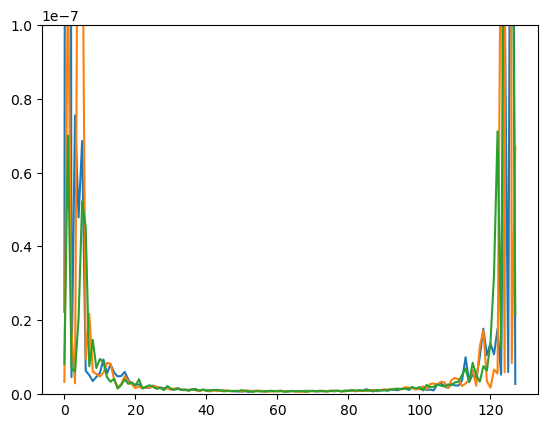

In [40]:
from pylab import *
%matplotlib inline

plot(fxbin[0])
plot(fxbin[1])
plot(fxbin[2])
#xlim([0,128])
ylim([0,1e-7])
show()

In [41]:
def Smoothen(fxbin):
    (ndim,nbins) = shape(fxbin)
    final = zeros(shape(fxbin))
    for idim in range(ndim):
        fxb = copy(fxbin[idim,:]) # widetilde{f}(x) copied
        #**** smooth the widetilde{f} value stored for each bin ****
        # f[i] <- (f[i+1]+f[i]+f[i-1])/3.
        fxb[:nbins-1] += fxbin[idim,1:nbins]
        fxb[1:nbins]  += fxbin[idim,:nbins-1]
        fxb[1:nbins-1] *= 1/3.
        fxb[0] *= 1/2.
        fxb[nbins-1] *= 1/2.
        norm = sum(fxb)
        if( norm == 0 ):
            print ('ERROR can not refine the grid with zero grid function')
            return # can not refine the grid if the function is zero.
        fxb *= 1.0/norm         # we normalize the function.
        # Note that normalization is such that the sum is 1.
        # And than we take the square root of abs value just in case the value is negative at a point.
        final[idim,:] = sqrt(abs(fxb))
    return final

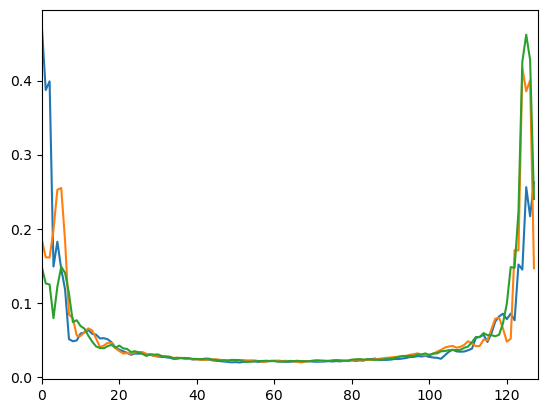

In [42]:
from pylab import *
%matplotlib inline

imp = Smoothen(fxbin)

plot(imp[0])
plot(imp[1])
plot(imp[2])
xlim([0,128])
show()

Note that we require $$f(g(x))\frac{dg}{dx} = const$$ 
which is equivalent to say that the weigh function will be $$w(x) \propto f(g(x))$$
because $\frac{dg}{dx}=\frac{1}{w(x)}$


Next we wanted to rewrite this identity in more useful way:
$$f(g(x))\frac{dg}{dx} = const = \int_{g(x)}^{g(x)+\frac{dg}{dx}dx} f(t) dt$$
which when discretized becomes

$$\int_{g_{l-1}}^{g_l} f(g_{old}) dg_{old} = \frac{I}{N_g}$$
where $I=\int_0^1 f(g_{old}) dg_{old}$ and $N_g$ is the number of discrete points $l$.

In [12]:
class Grid:
    """Contains the grid points g_n(x) with x=[0...1], and g=[0...1]
       for Vegas integration. There are n-dim g_n functions.
       Constraints : g(0)=0 and g(1)=1.
    """
    def __init__(self, ndim, nbins):
        self.g = zeros((ndim,nbins+1))  
        # a bit dirty trick: We will later use also g[-1] in interpolation, which should be set to zero, hence
        # we allocate dimension nbins+1, rather than nbinx
        self.ndim=ndim
        self.nbins=nbins
        # At the beginning we set g(x)=x
        # The grid-points are x_0 = 1/N, x_1 = 2/N, ... x_{N-1}=1.0. 
        # Note that g(0)=0, and we skip this point on the mesh.
        for idim in range(ndim):
            self.g[idim,:nbins] = arange(1,nbins+1)/float(nbins)
            
    def RefineGrid(self, imp):
        # imp[idim,ibin] is the input function \widetilde{f}(g) from which we construct the grid
        (ndim,nbins) = shape(imp)
        gnew = zeros((ndim,nbins+1))
        for idim in range(ndim):
            avgperbin = sum(imp[idim,:])/nbins
            #**** redefine the size of each bin  ****
            newgrid = zeros(nbins)
            cur=0.0
            newcur=0.0
            thisbin = 0.0
            ibin = -1
            # we are trying to determine
            #   Int[ f(g) dg, {g, g_{i-1},g_i}] == I/N_g
            #   where I == avgperbin
            for newbin in range(nbins-1):  # all but the last bin, which is 1.0
                while (thisbin < avgperbin) :
                    ibin+=1
                    thisbin += imp[idim,ibin] # adding widetilde{f}(g)
                    prev = cur               # g^old_{l-1}
                    cur = self.g[idim,ibin]  # g^old_{l}
                # Explanation is in order : 
                #   g^new_l should be somewhere between g^old_l and g^old_{l-1}, because if we add the last point
                #      we exceeded I/Ng value, while withouth the last point, we do not have enough. Hence need to interpolate.
                #   prev    -- g^{old}_{l-1}
                #   cur     -- g^{old}_l
                #   thisbin -- Sm = f_{l-k}+.... +f_{l-2}+f_{l-1}+f_l
                #   we know that  Sm is just a bit more than we need, i.e., I/N_g, hence we need to compute how much more
                #   using linear interpolation :
                #   g^{new} = g_l - (g_l-g_{l-1}) * (f_{l-k}+....+f_{l-2}+f_{l-1}+f_l - I/N_g)/f_l
                #    clearly
                #         if I/N_g == f_{l-k}+....+f_{l-2}+f_{l-1}+f_l
                #            we will get g^{new} = g_l
                #     and if I/N_g == f_{l-k}+....+f_{l-2}+f_{l-1}
                #            we will get g^{new} = g_{l-1}
                #     and if I/N_g  is between the two possibilities, we will get linear interpolation between
                #     g_{l-1} and g_l
                #     
                thisbin -= avgperbin   # thisbin <- (f_{l-k}+....+f_{l-2}+f_{l-1}+f_l - I/N_g)
                dx=thisbin/imp[idim,ibin] # dx is between 0 and 1
                # cur=g_l and prev=g_{l-1} and dx is the fraction of each we need to take for linear interpolation
                newgrid[newbin] = cur + (prev-cur)*dx # linear interpolation between g_l and g_{l-1}

            newgrid[nbins-1]=1.0
            gnew[idim,:nbins]= newgrid
        self.g = gnew
        return gnew

Update the class Grid, so that it can refine the grid

Vegas parameters:
       ndim = 3
       unit = 3.141592653589793
       maxeval = 200000
       nstart = 10000
       nincrease = 5000
       nbins = 128
       nbaths = 1000

1.3309249724420185 +- 0.024495231851185392 exact= 1.3932


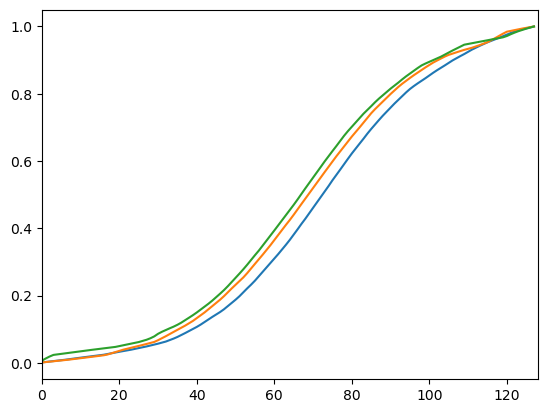

In [13]:
from scipy import *
from numpy import *

unit=pi
ndim=3
maxeval=200000
exact = 1.3932  # exact value of the integral
    
cum = Cumulants()
    
nbins=128
nstart =10000
nincrease=5000

grid = Grid(ndim,nbins)

fxbin = Vegas_step2(my_integrant2, pi, maxeval, nstart, nincrease, grid, cum)
imp = Smoothen(fxbin)
grid.RefineGrid(imp)
print(cum.avg, '+-', cum.err, 'exact=', exact)

plot(grid.g[0,:nbins])
plot(grid.g[1,:nbins])
plot(grid.g[2,:nbins])
xlim([0,128])
show()

In [14]:
def Vegas_step3(integrant, unit, maxeval, nstart, nincrease, grid, cum):
    ndim, nbins = grid.ndim,grid.nbins  # dimension of the integral, size of the grid for binning in each direction
    unit_dim = unit**ndim   # converts from unit cube integration to generalized cube with unit length
    nbatch=1000             # function will be evaluated in bacthes of 1000 evaluations at one time (for efficiency and storage issues)
    neval=0
    print ("""Vegas parameters:
       ndim = """+str(ndim)+"""
       unit = """+str(unit)+"""
       maxeval = """+str(maxeval)+"""
       nstart = """+str(nstart)+"""
       nincrease = """+str(nincrease)+"""
       nbins = """+str(nbins)+"""
       nbaths = """+str(nbatch)+"\n")

    bins = zeros((nbatch,ndim),dtype=int) # in which sampled bin does this point fall?
    
    
    all_nsamples = nstart
    for iter in range(1000):         # NEW in step 3
        wgh = zeros(nbatch)            # weights for each random point in the batch
        fxbin = zeros((ndim,nbins))    # after each iteration we reset the average function being binned
        for nsamples in range(all_nsamples,0,-nbatch):  # loop over all_nsample evaluations in batches of nbatch
            n = min(nbatch,nsamples)  # How many evaluations in this pass?
            # We are integrating f(g_1(x),g_2(y),g_3(z))*dg_1/dx*dg_2/dy*dg_3/dz dx*dy*dz
            # This is represented as  1/all_nsamples \sum_{x_i,y_i,z_i} f(g_1(x_i),g_2(y_i),g_3(z_i))*dg_1/dx*dg_2/dy*dg_3/dz
            #  where dg_1/dx = diff*NBINS
            xr = random.random((n,ndim)) # generates 2-d array of random numbers in the interval [0,1)
            for i in range(n):
                weight = 1.0/all_nsamples
                for dim in range(ndim):
                    # We want to evaluate the function f at point g(x), i.e, f(g_1(x),g_2(y),...)
                    # Here we transform the points x,y,z -> g_1(x), g_2(y), g_3(z)
                    # We hence want to evaluate g(x) ~ g(x[i]), where x is the random number and g is the grid function
                    # The discretized g(t) is defined on the grid :
                    #       t[-1]=0, t[0]=1/N, t[1]=2/N, t[2]=3/N ... t[N-1]=1.
                    # We know that g(0)=0 and g(1)=1, so that g[-1]=0.0 and g[N-1]=1.0
                    # To interpolate g at x, we first compute  i=int(x*N) and then we use linear interpolation
                    # g(x) = g[i-1] + (g[i]-g[i-1])*(x*N-i)  ;  if i>0
                    # g(x) =   0    + (g[0]-0)*(x*N-0)       ;  if i=0
                    #
                    pos = xr[i,dim]*nbins               # which grid would it fit ? (x*N)
                    ipos = int(pos)                     # the grid position is ipos : int(x*N)==i
                    diff = grid.g[dim,ipos] - grid.g[dim,ipos-1]  # g[i]-g[i-1]
                    # linear interpolation for g(x) : 
                    xr[i,dim] = (grid.g[dim,ipos-1] + (pos-ipos)*diff)*unit # g(xr) ~ ( g[i-1]+(g[i]-g[i-1])*(x*N-i) )*[units]
                    bins[i,dim]=ipos                    # remember in which bin this random number falls.
                    weight *= diff*nbins                #  weight for this dimension is dg/dx = (g[i]-g[i-1])*N
                                                        # because dx = i/N - (i-1)/N = 1/N
                wgh[i] = weight # total weight is  (df/dx)*(df/dy)*(df/dx).../N_{samples}
            
            # Here we evaluate function f on all randomly generated x points above
            fx = integrant(xr)  # n function evaluations required in single call
            neval += n  # We just added so many fuction evaluations
            
            # Now we compute the integral as weighted average, namely, f(g(x))*dg/dx
            wfun = wgh * fx           # weight * function ~ f_i*w_i            
            cum.sum += sum(wfun)      # sum_i f_i*w_i = <fw>
            wfun *= wfun              # carefull : this is like  (f_i * w_i/N)^2 hence  1/N (1/N (f_i*w_i)^2)
            cum.sqsum += sum(wfun)    # sum_i (f_i*w_i)^2 = <fw^2>/all_nsamples
                                      # 
            for dim in range(ndim):   #new2
                # Here we make a better approximation for the function, which we are integrating.
                for i in range(n):    #new2
                    fxbin[dim, bins[i,dim] ] += wfun[i] #new2: just bin the function f. We saved the bin position before.
            
        w0 = sqrt(cum.sqsum*all_nsamples)  # w0 = sqrt(<fw^2>)
        w1 = (w0 + cum.sum)*(w0 - cum.sum) # w1 = (w0^2 - <fw>^2) = (<fw^2>-<fw>^2)
        w = (all_nsamples-1)/w1            # w ~ 1/sigma_i^2 = (N-1)/(<fw^2>-<fw>^2)
        # Note that variance of the MC sampling is Var(monte-f) = (<f^2>-<f>^2)/N == 1/sigma_i^2
        cum.weightsum += w          # weightsum ~ \sum_i 1/sigma_i^2
        cum.avgsum += w*cum.sum     # avgsum    ~ \sum_i <fw>_i / sigma_i^2
        cum.avg2sum += w*cum.sum**2  # avg2cum   ~ \sum_i <fw>_i^2/sigma_i^2
        
        cum.avg = cum.avgsum/cum.weightsum     # I_best = (\sum_i <fw>_i/sigma_i^2 )/(\sum_i 1/sigma_i^2)
        cum.err = sqrt(1/cum.weightsum)        # err ~ sqrt(best sigma^2) = sqrt(1/(\sum_i 1/sigma_i^2))
     
        # NEW in this step3
        if iter>0:
            cum.chisq = (cum.avg2sum - 2*cum.avgsum*cum.avg + cum.weightsum*cum.avg**2)/iter
    
        print ("Iteration {:3d}: I= {:10.8f} +- {:10.8f}  chisq= {:10.8f} number of evaluations = {:7d} ".format(iter+1, cum.avg*unit_dim, cum.err*unit_dim, cum.chisq, neval))
        imp = Smoothen(fxbin)
        grid.RefineGrid(imp)
        
        cum.sum=0                    # clear the partial sum for the next step
        cum.sqsum=0
        all_nsamples += nincrease    # for the next time, increase the number of steps a bit
        if (neval>=maxeval): break
        
    cum.avg *= unit**ndim
    cum.err *= unit**ndim

Vegas parameters:
       ndim = 3
       unit = 3.141592653589793
       maxeval = 2000000
       nstart = 100000
       nincrease = 5000
       nbins = 128
       nbaths = 1000

Iteration   1: I= 1.36762346 +- 0.01023309  chisq= 0.00000000 number of evaluations =  100000 
Iteration   2: I= 1.38493614 +- 0.00552045  chisq= 4.03725299 number of evaluations =  205000 
Iteration   3: I= 1.39107078 +- 0.00365694  chisq= 3.11889891 number of evaluations =  315000 
Iteration   4: I= 1.39220291 +- 0.00285603  chisq= 2.16116961 number of evaluations =  430000 
Iteration   5: I= 1.39391923 +- 0.00246919  chisq= 1.97837591 number of evaluations =  550000 
Iteration   6: I= 1.39327395 +- 0.00216911  chisq= 1.64253221 number of evaluations =  675000 
Iteration   7: I= 1.39237495 +- 0.00190896  chisq= 1.49574064 number of evaluations =  805000 
Iteration   8: I= 1.39084621 +- 0.00171092  chisq= 1.74779014 number of evaluations =  940000 
Iteration   9: I= 1.39124007 +- 0.00159307  chisq= 1.57911830

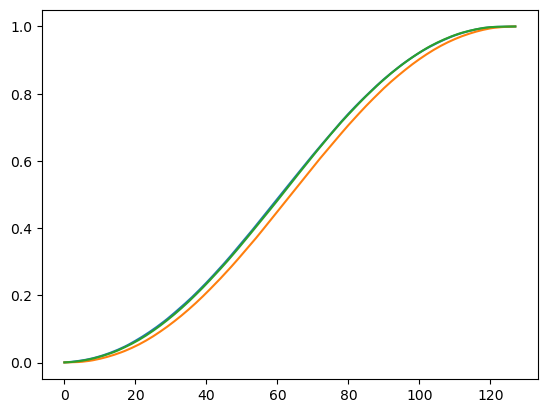

In [15]:
from scipy import *
from numpy import *

unit=pi
ndim=3
maxeval=2000000
exact = 1.3932  # exact value of the integral
    
cum = Cumulants()
    
nbins=128
nstart =100000
nincrease=5000

grid = Grid(ndim,nbins)

random.seed(0)

Vegas_step3(my_integrant2, pi, maxeval, nstart, nincrease, grid, cum)

print (cum.avg, '+-', cum.err, 'exact=', exact, 'real error=', abs(cum.avg-exact)/exact)

plot(grid.g[0,:nbins])
plot(grid.g[1,:nbins])
plot(grid.g[2,:nbins])
show()

Here we are going to speed up the code by using vectorized numpy capability, and `numba` capability.

Here `numba` will be used to set `fxbin` array, using `wfun` array, which contains projection of the function integrated to all axis.

To interpolate grid at the random points `xr`, we will use numpy vectorized functionality and `fancy indexing` to remove the loop over batches. All loops over batch size `n` is gone in the final version of the code.

In [16]:
from numba import jit

@jit(nopython=True)
def SetFxbin(fxbin,bins,wfun):
    (n,ndim) = bins.shape
    for dim in range(ndim):
        # Here we make a better approximation for the function, which we are integrating.
        for i in range(n):
            fxbin[dim, bins[i,dim] ] += abs(wfun[i]) # just bin the function f. We saved the bin position before.                


def Vegas_step3b(integrant, unit, maxeval, nstart, nincrease, grid, cum):
    ndim, nbins = grid.ndim,grid.nbins  # dimension of the integral, size of the grid for binning in each direction
    unit_dim = unit**ndim   # converts from unit cube integration to generalized cube with unit length
    nbatch=1000             # function will be evaluated in bacthes of 1000 evaluations at one time (for efficiency and storage issues)
    neval=0
    print ("""Vegas parameters:
       ndim = """+str(ndim)+"""
       unit = """+str(unit)+"""
       maxeval = """+str(maxeval)+"""
       nstart = """+str(nstart)+"""
       nincrease = """+str(nincrease)+"""
       nbins = """+str(nbins)+"""
       nbaths = """+str(nbatch)+"\n")

    bins = zeros((nbatch,ndim),dtype=int) # in which sampled bin does this point fall?
    
    
    all_nsamples = nstart
    for iter in range(1000):         # NEW in step 3
        wgh = zeros(nbatch)            # weights for each random point in the batch
        fxbin = zeros((ndim,nbins))    # after each iteration we reset the average function being binned
        for nsamples in range(all_nsamples,0,-nbatch):  # loop over all_nsample evaluations in batches of nbatch
            n = min(nbatch,nsamples)  # How many evaluations in this pass?
            # We are integrating f(g_1(x),g_2(y),g_3(z))*dg_1/dx*dg_2/dy*dg_3/dz dx*dy*dz
            # This is represented as  1/all_nsamples \sum_{x_i,y_i,z_i} f(g_1(x_i),g_2(y_i),g_3(z_i))*dg_1/dx*dg_2/dy*dg_3/dz
            #  where dg_1/dx = diff*NBINS
            xr = random.random((n,ndim)) # generates 2-d array of random numbers in the interval [0,1)
            pos = xr*nbins                   # (x*N)
            bins = array(pos,dtype=int)      # which grid would it fit ? (x*N)
            wgh = ones(nbatch)/all_nsamples
            for dim in range(ndim):   
                # We want to evaluate the function f at point g(x), i.e, f(g_1(x),g_2(y),...)
                # Here we transform the points x,y,z -> g_1(x), g_2(y), g_3(z)
                # We hence want to evaluate g(x) ~ g(x[i]), where x is the random number and g is the grid function
                # The discretized g(t) is defined on the grid :
                #       t[-1]=0, t[0]=1/N, t[1]=2/N, t[2]=3/N ... t[N-1]=1.
                # We know that g(0)=0 and g(1)=1, so that g[-1]=0.0 and g[N-1]=1.0
                # To interpolate g at x, we first compute  i=int(x*N) and then we use linear interpolation
                # g(x) = g[i-1] + (g[i]-g[i-1])*(x*N-int(x*N))
                gi = grid.g[dim,bins[:,dim]]            # g[i]
                gm = grid.g[dim,bins[:,dim]-1]          # g[i-1]
                diff = gi - gm                          # g[i]-g[i-1]
                gx = gm + (pos[:,dim]-bins[:,dim])*diff # linear interpolation g(xr)
                xr[:,dim] = gx*unit                     # xr <- g(xr)
                wgh *= diff*nbins                       # wgh = prod_{dim} dg/dx
            
            # Here we evaluate function f on all randomly generated x points above
            fx = integrant(xr)  # n function evaluations required in single call
            neval += n  # We just added so many fuction evaluations
            
            # Now we compute the integral as weighted average, namely, f(g(x))*dg/dx
            wfun = wgh * fx           # weight * function ~ f_i*w_i            
            cum.sum += sum(wfun)      # sum_i f_i*w_i = <fw>
            wfun *= wfun              # carefull : this is like  (f_i * w_i/N)^2 hence  1/N (1/N (f_i*w_i)^2)
            cum.sqsum += sum(wfun)    # sum_i (f_i*w_i)^2 = <fw^2>/all_nsamples
                                      # 
            SetFxbin(fxbin,bins,wfun)
            #for dim in range(ndim):   #new2
            #    # Here we make a better approximation for the function, which we are integrating.
            #    for i in range(n):    #new2
            #        fxbin[dim, bins[i,dim] ] += wfun[i] #new2: just bin the function f. We saved the bin position before.
            
        w0 = sqrt(cum.sqsum*all_nsamples)  # w0 = sqrt(<fw^2>)
        w1 = (w0 + cum.sum)*(w0 - cum.sum) # w1 = (w0^2 - <fw>^2) = (<fw^2>-<fw>^2)
        w = (all_nsamples-1)/w1            # w ~ 1/sigma_i^2 = (N-1)/(<fw^2>-<fw>^2)
        # Note that variance of the MC sampling is Var(monte-f) = (<f^2>-<f>^2)/N == 1/sigma_i^2
        cum.weightsum += w          # weightsum ~ \sum_i 1/sigma_i^2
        cum.avgsum += w*cum.sum     # avgsum    ~ \sum_i <fw>_i / sigma_i^2
        cum.avg2sum += w*cum.sum**2  # avg2cum   ~ \sum_i <fw>_i^2/sigma_i^2
        
        cum.avg = cum.avgsum/cum.weightsum     # I_best = (\sum_i <fw>_i/sigma_i^2 )/(\sum_i 1/sigma_i^2)
        cum.err = sqrt(1/cum.weightsum)        # err ~ sqrt(best sigma^2) = sqrt(1/(\sum_i 1/sigma_i^2))
     
        # NEW in this step3
        if iter>0:
            cum.chisq = (cum.avg2sum - 2*cum.avgsum*cum.avg + cum.weightsum*cum.avg**2)/iter
    
        print ("Iteration {:3d}: I= {:10.8f} +- {:10.8f}  chisq= {:10.8f} number of evaluations = {:7d} ".format(iter+1, cum.avg*unit_dim, cum.err*unit_dim, cum.chisq, neval))
        imp = Smoothen(fxbin)
        grid.RefineGrid(imp)
        
        cum.sum=0                    # clear the partial sum for the next step
        cum.sqsum=0
        all_nsamples += nincrease    # for the next time, increase the number of steps a bit
        if (neval>=maxeval): break
        
    cum.avg *= unit**ndim
    cum.err *= unit**ndim

Vegas parameters:
       ndim = 3
       unit = 3.141592653589793
       maxeval = 2000000
       nstart = 100000
       nincrease = 5000
       nbins = 128
       nbaths = 1000

Iteration   1: I= 1.36762346 +- 0.01023309  chisq= 0.00000000 number of evaluations =  100000 
Iteration   2: I= 1.38493614 +- 0.00552045  chisq= 4.03725299 number of evaluations =  205000 
Iteration   3: I= 1.39107078 +- 0.00365694  chisq= 3.11889891 number of evaluations =  315000 
Iteration   4: I= 1.39220291 +- 0.00285603  chisq= 2.16116961 number of evaluations =  430000 
Iteration   5: I= 1.39391923 +- 0.00246919  chisq= 1.97837591 number of evaluations =  550000 
Iteration   6: I= 1.39327395 +- 0.00216911  chisq= 1.64253221 number of evaluations =  675000 
Iteration   7: I= 1.39237495 +- 0.00190896  chisq= 1.49574064 number of evaluations =  805000 
Iteration   8: I= 1.39084621 +- 0.00171092  chisq= 1.74779014 number of evaluations =  940000 
Iteration   9: I= 1.39124007 +- 0.00159307  chisq= 1.57911830

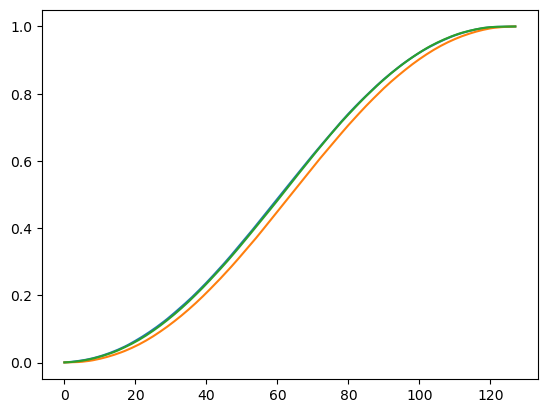

In [17]:
from scipy import *
from numpy import *

unit=pi
ndim=3
maxeval=2000000
exact = 1.3932  # exact value of the integral
    
cum = Cumulants()
    
nbins=128
nstart =100000
nincrease=5000

grid = Grid(ndim,nbins)

random.seed(0)

Vegas_step3b(my_integrant2, pi, maxeval, nstart, nincrease, grid, cum)

print (cum.avg, '+-', cum.err, 'exact=', exact, 'real error=', abs(cum.avg-exact)/exact)

plot(grid.g[0,:nbins])
plot(grid.g[1,:nbins])
plot(grid.g[2,:nbins])
show()

## Homework

* generalize Vegas algorithm so that the integration limits are given by arbitrary numbers [a,b]. You can still assume supercube in which all dimensions have the same limit [a,b].
* Test Vegas on the same example $f=1/(1-\cos(k_x)\cos(k_y)\cos(k_z))/\pi^3$ but use limits $[-\pi,\pi]$ instead of $[0,\pi]$.
* Speed up the part of the code that Redefines the grid `RefineGrid`
* generalize Vegas so that it works for complex functions.
* Using Vegas, evaluate the following Linhardt function:

\begin{eqnarray}
P(\Omega,\vec{q}) = -2 \int \frac{d^3k}{(2\pi)^3} \frac{f(\varepsilon_{\vec{k}+\vec{q}})-f(\varepsilon_{\vec{k}})}{\Omega-\varepsilon_{\vec{k}+\vec{q}}+\varepsilon_\vec{k}+i\delta}
\end{eqnarray}

Here $\varepsilon_\vec{k}=k^2-k_F^2$.

We will use $k_F=\frac{(\frac{9\pi}{4})^{1/3}}{rs}$ with $r_s=2$, $f(x) = 1/(\exp(x/T)+1)$, $T=0.02 k_F^2$, $\delta = 0.002 k_F^2$, $\Omega=0$, $q=0.1 k_F$, integration limits can be set to $[-3 k_F,3 k_F]$.

The result for $P(\Omega=0,q<< k_F)$ should be close to $-n_F$, where $n_F = \frac{k_F}{2\pi^2}$.

* Optional: Change the Vegas algorithm so that it computes $P(\Omega,\vec{q})$ at once for an array of $\Omega$ points, such as `linspace(0,0.5*kF*kF,200)`. Use $P(\Omega=0)$ to redefine the grid, so that we have most efficient integration at $\Omega=0$ (where the function is hardest to integrate).